<a href="https://colab.research.google.com/github/vikvav/Math.-Statistics/blob/main/lab2/%D0%9C%D0%B0%D1%82_%D1%81%D1%82%D0%B0%D1%82_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

## Построение доверительного интервала для разности математических ожиданий (вариант 1)

В этом эксперименте мы оцениваем, насколько хорошо 95%-ный доверительный интервал для разности средних двух нормальных распределений покрывает истинное значение параметра.

Даны две независимые выборки из нормальных распределений:

- $X_1 \sim \mathcal{N}(\mu_1 = 2, \sigma_1^2 = 1)$  
- $X_2 \sim \mathcal{N}(\mu_2 = 1, \sigma_2^2 = 0.5)$

Мы оцениваем параметр:

$$
\tau = \mu_1 - \mu_2 = 1
$$

Так как дисперсии известны, для построения доверительного интервала используется нормальное распределение и статистика:

$$
Z = \frac{\bar{X}_1 - \bar{X}_2 - \tau}{\sigma}, \quad \text{где} \quad \sigma^2 = \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}
$$

---

### Алгоритм:

1. Задаём уровень значимости: $\alpha = 0.05$, значит уровень доверия: $1 - \alpha = 0.95$.

2. Строим по одной выборке из каждого распределения. Размеры выборок:
   - сначала: $n_1 = n_2 = 25$
   - затем: $n_1 = n_2 = 1000$

3. Для каждой пары выборок вычисляем разность средних: $\bar{X}_1 - \bar{X}_2$

4. Рассчитываем стандартное отклонение оценщика:  
   $\sigma = \sqrt{ \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2} }$

5. Строим 95%-ный доверительный интервал:  
   $\left( \bar{X}_1 - \bar{X}_2 \right) \pm z_{1 - \alpha/2} \cdot \sigma$

6. Повторяем эксперимент 1000 раз и считаем, в каком проценте случаев доверительный интервал содержит истинное значение параметра $\tau = 1$.

7. Сравниваем результаты между случаями с $n = 25$ и $n = 1000$. Анализируем, как влияет размер выборки на покрытие и ширину интервалов.

---

Этот эксперимент позволяет проследить, как меняется качество оценки параметра при увеличении размера выборки при фиксированном уровне доверия.


Доля интервалов (n1=n2=25), содержащих реальное значение τ: 0.948


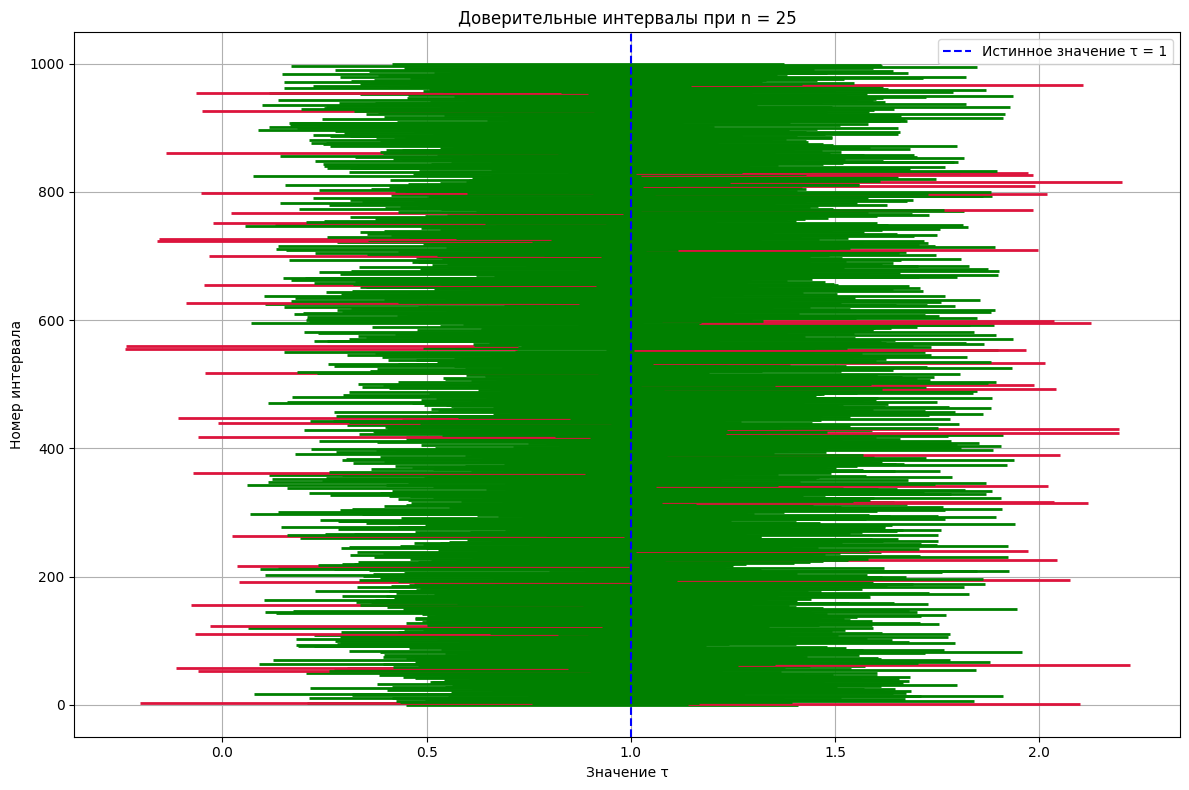

Доля интервалов (n1=n2=1000), содержащих реальное значение τ: 0.954


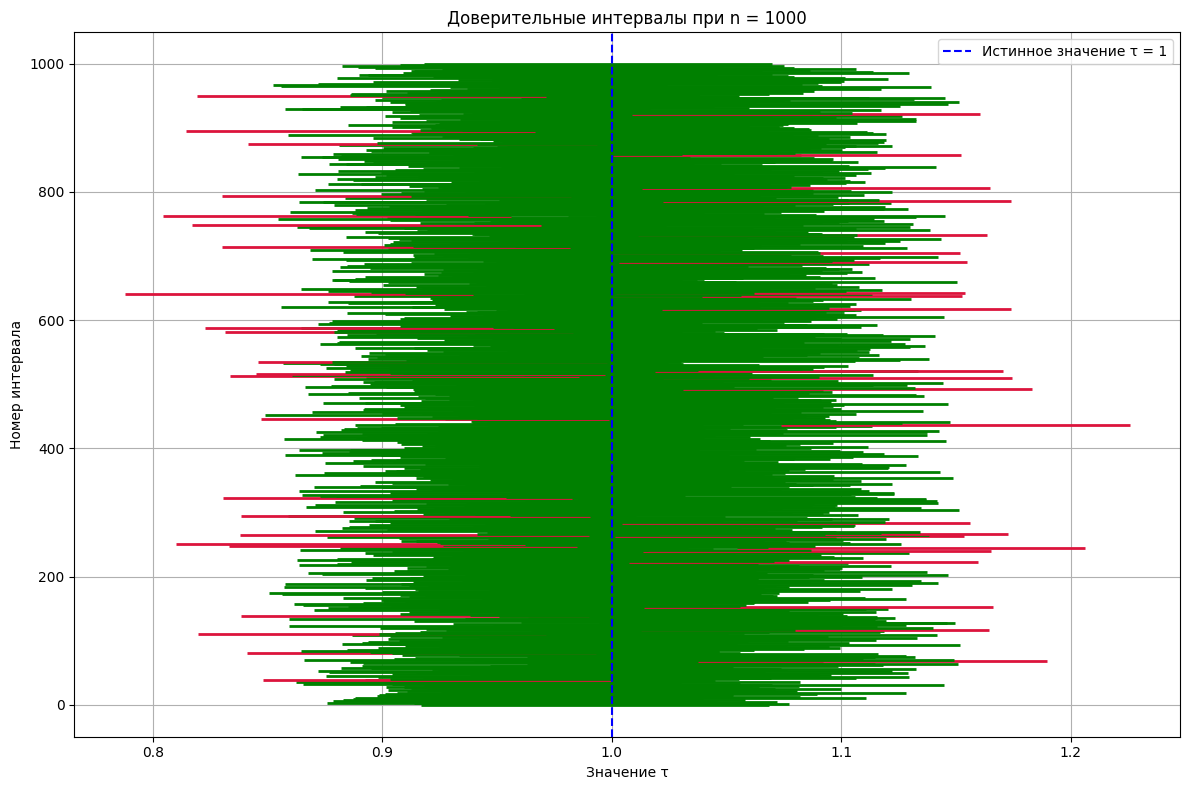

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Основная функция с возможностью возврата интервалов
def run_experiment(n1, n2, mu1=2, mu2=1, sigma1_sq=1.0, sigma2_sq=0.5, alpha=0.05, num_trials=1000, return_intervals=False):
    tau_real = mu1 - mu2
    sigma_sq = sigma1_sq / n1 + sigma2_sq / n2
    sigma = np.sqrt(sigma_sq)
    z_crit = stats.norm.ppf(1 - alpha / 2)

    count_contains_tau = 0
    intervals = []

    for _ in range(num_trials):
        x1_sample = np.random.normal(mu1, np.sqrt(sigma1_sq), n1)
        x2_sample = np.random.normal(mu2, np.sqrt(sigma2_sq), n2)

        delta = x1_sample.mean() - x2_sample.mean()
        lower = delta - z_crit * sigma
        upper = delta + z_crit * sigma

        if lower <= tau_real <= upper:
            count_contains_tau += 1

        if return_intervals:
            intervals.append((lower, upper))

    if return_intervals:
        return count_contains_tau / num_trials, intervals, tau_real
    else:
        return count_contains_tau / num_trials

# График интервалов
def plot_intervals(intervals, true_value, title='Доверительные интервалы для τ'):
    plt.figure(figsize=(12, 8))
    for i, (start, end) in enumerate(intervals):
        color = 'green' if start <= true_value <= end else 'crimson'
        plt.hlines(i, start, end, colors=color, linewidth=2)
    plt.axvline(true_value, color='blue', linestyle='--', label=f'Истинное значение τ = {true_value}')
    plt.xlabel('Значение τ')
    plt.ylabel('Номер интервала')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Первый случай: n1 = n2 = 25
coverage_25, intervals_25, tau = run_experiment(n1=25, n2=25, return_intervals=True)
print(f"Доля интервалов (n1=n2=25), содержащих реальное значение τ: {coverage_25:.3f}")
plot_intervals(intervals_25, tau, title='Доверительные интервалы при n = 25')

# Второй случай: n1 = n2 = 1000
coverage_1000, intervals_1000, _ = run_experiment(n1=1000, n2=1000, return_intervals=True)
print(f"Доля интервалов (n1=n2=1000), содержащих реальное значение τ: {coverage_1000:.3f}")
plot_intervals(intervals_1000, tau, title='Доверительные интервалы при n = 1000')

## Построение доверительного интервала при неизвестных, но равных дисперсиях (вариант 2)

Во втором варианте рассматриваются две независимые выборки из нормальных распределений. Истинные дисперсии $\sigma_1^2$ и $\sigma_2^2$ предполагаются равными, но **неизвестны**, поэтому для построения доверительного интервала необходимо использовать выборочные оценки и распределение Стьюдента.

**Заданные параметры распределений:**

- $X_1 \sim \mathcal{N}(\mu_1 = 2,\ \sigma_1^2 = 1)$  
- $X_2 \sim \mathcal{N}(\mu_2 = 1,\ \sigma_2^2 = 1)$


Оцениваемый параметр:  
$\tau = \mu_1 - \mu_2 = 1$

Так как дисперсии неизвестны, вместо них используются **смещённые выборочные дисперсии**:

- $S_*^2(X_1) = \frac{1}{n_1} \sum_{i=1}^{n_1}(X_{1i} - \bar{X}_1)^2$
- $S_*^2(X_2) = \frac{1}{n_2} \sum_{i=1}^{n_2}(X_{2i} - \bar{X}_2)^2$

Тогда **объединённая (общая) дисперсия** оценивается как:

$$
s_{\text{pooled}}^2 = \frac{n_1 S_*^2(X_1) + n_2 S_*^2(X_2)}{n_1 + n_2}
$$

Доверительный интервал строится на основе следующей статистики:

$$
T = \frac{\bar{X}_1 - \bar{X}_2 - \tau}
{\sqrt{ \frac{n_1 n_2 (n_1 + n_2 - 2)}{n_1 + n_2} \cdot
\left( \frac{S_*^2(X_1)}{n_1} + \frac{S_*^2(X_2)}{n_2} \right)}}=\frac{\bar{X}_1 - \bar{X}_2 - \tau}{SE}
$$

Эта статистика подчиняется **распределению Стьюдента** с $n_1 + n_2 - 2$ степенями свободы. На её основе строится доверительный интервал уровня $1 - \alpha$:

$$
\tau \in
\left[
(\bar{X}_1 - \bar{X}_2) \pm t_{1 - \alpha/2}^{(n_1 + n_2 - 2)} \cdot SE
\right]
$$

где $SE$ — оценка стандартной ошибки, а $t_{1 - \alpha/2}$ — квантиль распределения Стьюдента.

---

**Ход эксперимента:**

- Повторяется генерация выборок и построение доверительного интервала **1000 раз**.
- Сравниваются два случая: при $n_1 = n_2 = 25$ и при $n_1 = n_2 = 1000$.
- Для каждого случая подсчитывается доля доверительных интервалов, в которые попало истинное значение параметра $\tau = 1$.

Такой подход позволяет оценить **реальное покрытие** доверительного интервала и проанализировать, как оно зависит от объёма выборки.

### Как появилась формула T?

Начальная запись из условия:

$$
T = A \cdot \frac{\Delta}{B}
$$

где  
$A = \sqrt{ \frac{n_1 n_2 (n_1 + n_2 - 2)}{n_1 + n_2} }$ — вынесенный множитель,  
$\Delta = \bar{X}_1 - \bar{X}_2 - \tau$ — числитель,  
$B = \sqrt{n_1 S_*^2(X_1) + n_2 S_*^2(X_2)}$ — знаменатель.

---

Преобразуем в дробь с единым корнем:

$$
T = \frac{\Delta}{\frac{B}{A}} = \frac{\Delta}{\sqrt{\frac{B^2}{A^2}}}
$$

Подставим $B^2$ и $A^2$:

$$
T = \frac{ \bar{X}_1 - \bar{X}_2 - \tau }
{ \sqrt{ \frac{n_1 S_*^2(X_1) + n_2 S_*^2(X_2)}{ \frac{n_1 n_2 (n_1 + n_2 - 2)}{n_1 + n_2} } } }
$$

Инвертируем дробь под корнем:

$$
T = \frac{ \bar{X}_1 - \bar{X}_2 - \tau }
{ \sqrt{ \frac{n_1 + n_2}{n_1 n_2 (n_1 + n_2 - 2)} \cdot \left( n_1 S_*^2(X_1) + n_2 S_*^2(X_2) \right) } }
$$

Разделим и домножим каждое слагаемое в скобках:

$$
n_1 S_*^2(X_1) + n_2 S_*^2(X_2) =
n_1 n_2 \left( \frac{S_*^2(X_1)}{n_2} + \frac{S_*^2(X_2)}{n_1} \right)
$$

или удобнее сразу перейти к:

$$
\left( \frac{S_*^2(X_1)}{n_1} + \frac{S_*^2(X_2)}{n_2} \right)
$$

Тогда окончательное выражение:

$$
T = \frac{ \bar{X}_1 - \bar{X}_2 - \tau }
{ \sqrt{ \frac{n_1 n_2 (n_1 + n_2 - 2)}{n_1 + n_2} \cdot \left( \frac{S_*^2(X_1)}{n_1} + \frac{S_*^2(X_2)}{n_2} \right) } }
$$

Это классическая форма t-статистики, которая используется для построения доверительного интервала.


### Как появилась формула $\tau$?

Из формулы доверительного интервала:

$$
T = \frac{(\bar{X}_1 - \bar{X}_2) - \tau}{SE}
$$

где:  
$ \tau = \mu_1 - \mu_2 $ — неизвестная разность математических ожиданий;  
$ \bar{X}_1 - \bar{X}_2 $ — выборочная оценка этой разности;  
$ SE $ — стандартная ошибка.

По свойству t-распределения: $T \sim t_{n_1 + n_2 - 2}$, то с доверительной вероятностью $1 - \alpha$ выполняется:

$$
P\left(
- t_{1 - \alpha/2}^{(n_1 + n_2 - 2)}
\leq
T
\leq
t_{1 - \alpha/2}^{(n_1 + n_2 - 2)}
\right)
= 1 - \alpha
$$


$$
P\left(
- t_{1 - \alpha/2}^{(n_1 + n_2 - 2)}
\leq
\frac{(\bar{X}_1 - \bar{X}_2) - \tau}{SE}
\leq
t_{1 - \alpha/2}^{(n_1 + n_2 - 2)}
\right)
= 1 - \alpha
$$

Умножим на $SE$:

$$
P\left(
- t \cdot SE
\leq
(\bar{X}_1 - \bar{X}_2) - \tau
\leq
t \cdot SE
\right)
= 1 - \alpha
$$

где $t = t_{1 - \alpha/2}^{(n_1 + n_2 - 2)}$

Прибавим $\tau$ и выразим интервал:

$$
P\left(
(\bar{X}_1 - \bar{X}_2) - t \cdot SE
\leq
\tau
\leq
(\bar{X}_1 - \bar{X}_2) + t \cdot SE
\right)
= 1 - \alpha
$$

Таким образом, доверительный интервал для параметра $\tau = \mu_1 - \mu_2$ имеет вид:

$$
\tau \in \left[
(\bar{X}_1 - \bar{X}_2) \pm t_{1 - \alpha/2}^{(n_1 + n_2 - 2)} \cdot SE
\right]
$$

Обозначения:  
- Нижний индекс $1 - \alpha/2$ — это доверительная вероятность, то есть квантиль $t$-распределения, соответствующий уровню доверия $1 - \alpha$;  
- Верхний индекс $n_1 + n_2 - 2$ — число степеней свободы, поскольку из каждой выборки уже посчитано среднее;  
- $t_{1 - \alpha/2}^{(n_1 + n_2 - 2)}$ — квантиль $t$-распределения, который определяет ширину интервала.


---
**Как считается квантили t-распределения:**

---

Случай 1: $n_1 = n_2 = 25$

- Уровень значимости: $\alpha = 0.05$
- Уровень доверия: $1 - \alpha = 0.95$
- Поскольку интервал двусторонний, используется квантиль $t_{1 - \alpha/2} = t_{0.975}$
- Степени свободы: $n_1 + n_2 - 2 = 25 + 25 - 2 = 48$
- Квантиль:  
  $$
  t_{1 - \alpha/2}^{(48)} = t_{0.975}^{(48)} \approx 2.0106
  $$

---

Случай 2: $n_1 = n_2 = 1000$

- Уровень значимости: $\alpha = 0.05$
- Уровень доверия: $1 - \alpha = 0.95$
- $t_{1 - \alpha/2} = t_{0.975}$
- Степени свободы: $1000 + 1000 - 2 = 1998$
- Квантиль:
  $$
  t_{1 - \alpha/2}^{(1998)} = t_{0.975}^{(1998)} \approx 1.961
  $$

(Для $n \geq 100$ t-распределение становится практически неотличимо от нормального, и $t_{0.975}^{(\infty)} \approx 1.96$)

---

Значение $t_{1 - \alpha/2}^{(k)}$ вручную по **таблице критических значений t-распределения Стьюдента**.


### Как появилась формула общей дисперсии $s_{\text{pooled}}^2$?



Пусть заданы смещённые выборочные дисперсии:

$$
S_*^2(X_1) = \frac{1}{n_1} \sum_{i=1}^{n_1} (X_{1i} - \bar{X}_1)^2
$$

$$
S_*^2(X_2) = \frac{1}{n_2} \sum_{i=1}^{n_2} (X_{2i} - \bar{X}_2)^2
$$

Умножим обе части уравнений на $n_1$ и $n_2$ соответственно:

$$
n_1 S_*^2(X_1) = \sum_{i=1}^{n_1} (X_{1i} - \bar{X}_1)^2
$$

$$
n_2 S_*^2(X_2) = \sum_{i=1}^{n_2} (X_{2i} - \bar{X}_2)^2
$$

Теперь найдём общую сумму квадратов отклонений для обеих выборок:

$$
\text{Total SS} = n_1 S_*^2(X_1) + n_2 S_*^2(X_2)
$$

Итоговая объединённая дисперсия определяется как среднее по всем $n_1 + n_2$ элементам:

$$
s_{\text{pooled}}^2 = \frac{n_1 S_*^2(X_1) + n_2 S_*^2(X_2)}{n_1 + n_2}
$$

---

Таким образом, объединённая дисперсия — это **взвешенное среднее смещённых дисперсий** обеих выборок, где веса пропорциональны числу наблюдений.


### Как появилась формула SE?

Мы хотим построить доверительный интервал для разности средних двух выборок: $
\tau = \mu_1 - \mu_2$

Но мы можем оценить только: $
\bar{X}_1 - \bar{X}_2
$

Чтобы построить доверительный интервал, нужно понять, **насколько может колебаться** эта оценка — то есть найти её **дисперсию**, а затем — **стандартное отклонение**, которое и называется **стандартной ошибкой (Standard Error)**.

---

**Шаг 1: Дисперсия разности средних**

Если выборки независимы и дисперсии равны: $\sigma_1^2 = \sigma_2^2 = \sigma^2$, то:

$$
\mathrm{Var}(\bar{X}_1 - \bar{X}_2) = \mathrm{Var}(\bar{X}_1) + \mathrm{Var}(\bar{X}_2)
= \frac{\sigma^2}{n_1} + \frac{\sigma^2}{n_2}
= \sigma^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)
$$

---

**Шаг 2: Подставляем вместо $\sigma^2$ объединённую оценку**

Так как $\sigma^2$ неизвестна, мы заменяем её на объединённую (pooled) дисперсию, вычисленную на основе смещённых дисперсий:

$$
s_{\text{pooled}}^2 = \frac{n_1 S_*^2(X_1) + n_2 S_*^2(X_2)}{n_1 + n_2}
$$

---

**Шаг 3: Стандартная ошибка**

Теперь стандартная ошибка (то есть стандартное отклонение разности средних):

$$
SE = \sqrt{ \widehat{\mathrm{Var}}(\bar{X}_1 - \bar{X}_2) }
= \sqrt{ s_{\text{pooled}}^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right) }
$$

---
**Пояснение:**

- **$SE$** (Standard Error) — это **стандартное отклонение оценочной величины**.
- Оно показывает, **насколько сильно может колебаться** $\bar{X}_1 - \bar{X}_2$ при случайных выборках из той же совокупности.
- Чем больше объёмы выборок $n_1$, $n_2$ — тем меньше $SE$, и тем **уже доверительный интервал**.


### Код

Доля интервалов (n1=n2=25), содержащих реальное значение τ: 0.951
Интервал накрыл τ в 951 из 1000 случаев.



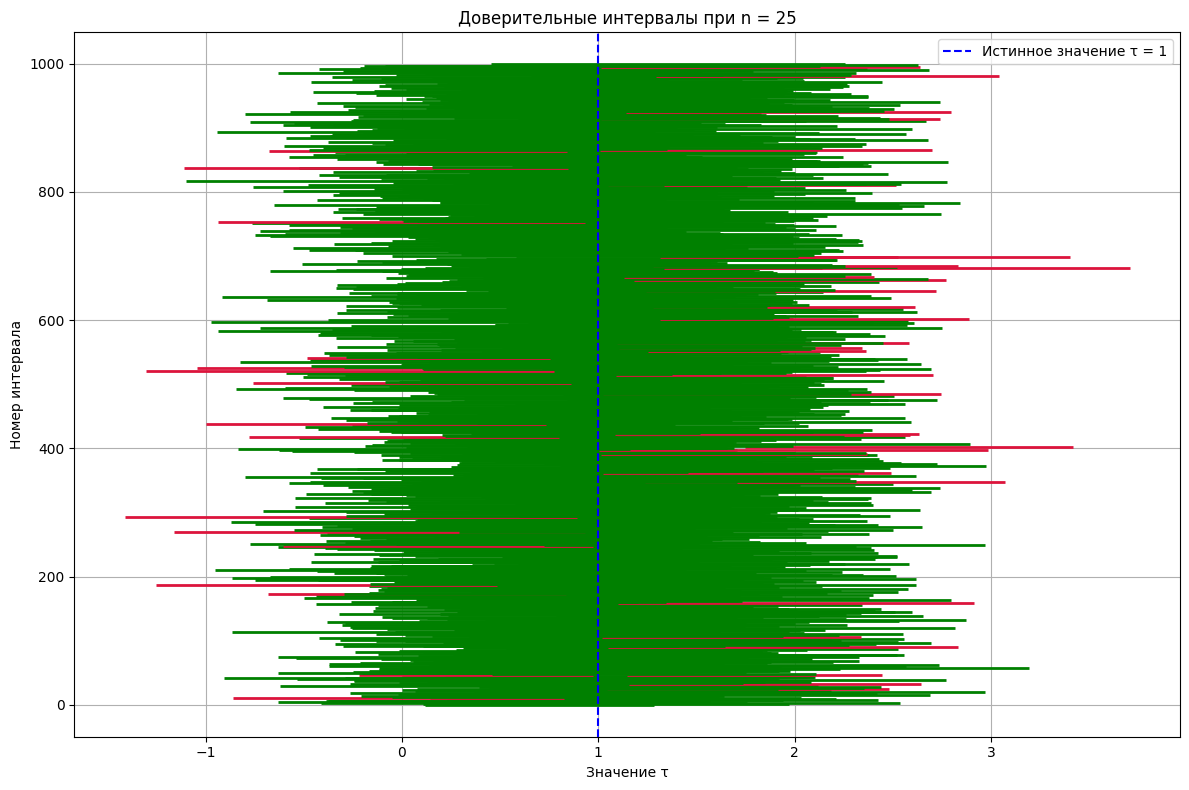

Доля интервалов (n1=n2=1000), содержащих реальное значение τ: 0.950
Интервал накрыл τ в 950 из 1000 случаев.


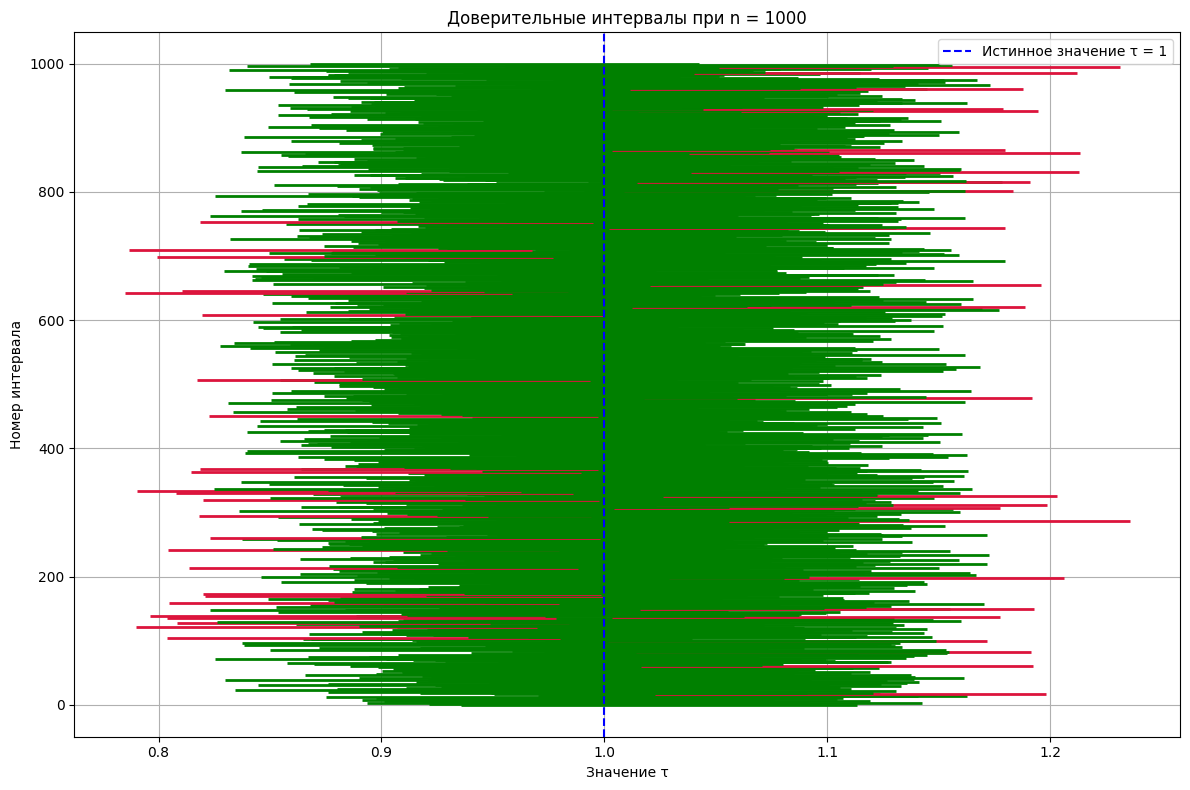

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Основная функция с логикой расчёта и опцией возврата интервалов
def run_experiment_t(n1, n2, mu1=2, mu2=1, sigma1_sq=1.0, sigma2_sq=1.0, alpha=0.05, num_trials=1000, return_intervals=False):
    tau_real = mu1 - mu2
    count_contains_tau = 0
    df = n1 + n2 - 2
    intervals = []

    for _ in range(num_trials):
        # Генерация выборок
        x1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n1)
        x2 = np.random.normal(mu2, np.sqrt(sigma2_sq), n2)

        # Выборочные средние и разность
        delta = x1.mean() - x2.mean()

        # Смещённые выборочные дисперсии
        s1_sq = np.var(x1, ddof=0)
        s2_sq = np.var(x2, ddof=0)

        # Объединённая дисперсия
        pooled_sigma_sq = (n1 * s1_sq + n2 * s2_sq) / (n1 + n2)
        se = np.sqrt(pooled_sigma_sq * (1 / n1 + 1 / n2))

        # Критическое значение
        t_crit = stats.t.ppf(1 - alpha / 2, df)

        # Интервал
        lower = delta - t_crit * se
        upper = delta + t_crit * se

        if lower <= tau_real <= upper:
            count_contains_tau += 1

        if return_intervals:
            intervals.append((lower, upper))

    if return_intervals:
        return count_contains_tau / num_trials, intervals, tau_real, count_contains_tau
    else:
        return count_contains_tau / num_trials

# Функция для отрисовки графика интервалов
def plot_intervals(intervals, true_value, title='Доверительные интервалы для τ'):
    plt.figure(figsize=(12, 8))
    for i, (start, end) in enumerate(intervals):
        color = 'green' if start <= true_value <= end else 'crimson'
        plt.hlines(i, start, end, colors=color, linewidth=2)
    plt.axvline(true_value, color='blue', linestyle='--', label=f'Истинное значение τ = {true_value}')
    plt.xlabel('Значение τ')
    plt.ylabel('Номер интервала')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Случай 1: n = 25
coverage_25, intervals_25, tau, count_25 = run_experiment_t(n1=10, n2=10, return_intervals=True)
print(f"Доля интервалов (n1=n2=25), содержащих реальное значение τ: {coverage_25:.3f}")
print(f"Интервал накрыл τ в {count_25} из 1000 случаев.\n")
plot_intervals(intervals_25, tau, title='Доверительные интервалы при n = 25')

# Случай 2: n = 1000
coverage_1000, intervals_1000, _, count_1000 = run_experiment_t(n1=1000, n2=1000, return_intervals=True)
print(f"Доля интервалов (n1=n2=1000), содержащих реальное значение τ: {coverage_1000:.3f}")
print(f"Интервал накрыл τ в {count_1000} из 1000 случаев.")
plot_intervals(intervals_1000, tau, title='Доверительные интервалы при n = 1000')


Результаты подтверждают корректность подхода: доля попаданий близка к заданному уровню доверия $1 - \alpha = 0.95$.

На графиках видно, что при меньшем объёме выборки (n=25) интервалы гораздо шире и более разбросаны, тогда как при $n = 1000$ интервалы становятся узкими и сосредоточены вблизи истинного значения $\tau$.

---

Таким образом:

- **Вероятность попадания** остаётся близкой к $0.95$, как и положено по теории.
- **Интервалы при $n = 1000$ значительно уже**, что указывает на **меньшую погрешность и большую точность** оценки параметра.
- **Вариация ширины интервалов уменьшается**, а сами оценки становятся **более устойчивыми** при повторении эксперимента.

Это демонстрирует, что увеличение объёма выборки улучшает **стабильность и надёжность оценок**, не изменяя при этом заданную вероятность покрытия.

## Оценка отношения дисперсий при неизвестных средних (вариант 3)

В этом варианте требуется построить доверительный интервал для параметра отношения дисперсий:
$$
\tau = \frac{\sigma_1^2}{\sigma_2^2}
$$

Средние значения $\mu_1$, $\mu_2$ неизвестны, а дисперсии заданы:

- $\sigma_1^2 = 2$, $\sigma_2^2 = 1$
- $\mu_1 = 0$, $\mu_2 = 0$ (для генерации выборок)

Так как средние неизвестны, используем выборочные **смещённые дисперсии** $S_*^2(X_1)$ и $S_*^2(X_2)$.

Статистика, на основе которой строим доверительный интервал:

$$
F = \frac{n_1(n_2 - 1)}{n_2(n_1 - 1)} \cdot \frac{S_*^2(X_1)}{S_*^2(X_2)} \cdot \frac{\sigma_2^2}{\sigma_1^2}
$$

Для построения доверительного интервала используется **распределение Фишера** $F_{n_1 - 1, \; n_2 - 1}$.

---

Цель эксперимента — повторить процедуру 1000 раз при разных объёмах выборок ($n = 25$ и $n = 1000$) и подсчитать долю интервалов, содержащих истинное значение параметра $\tau = 2$.


Доля интервалов (n=25), содержащих реальное значение τ: 0.955


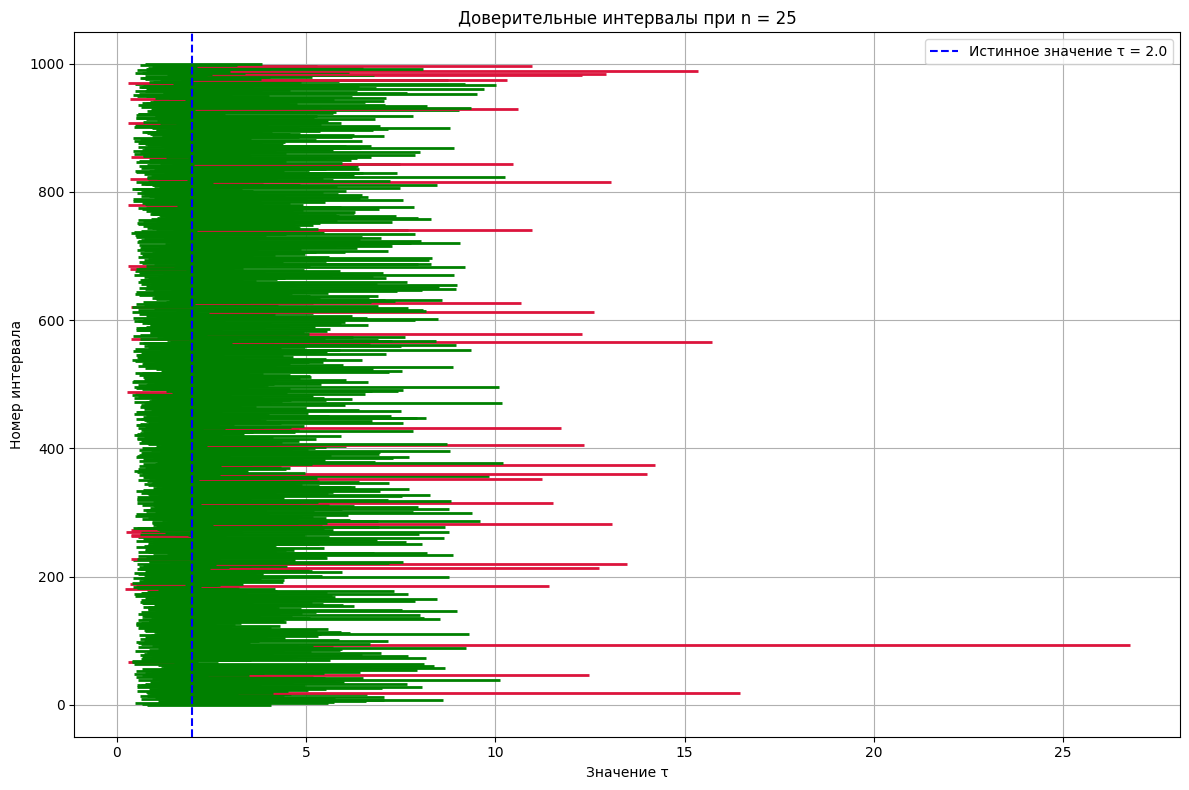

Доля интервалов (n=1000), содержащих реальное значение τ: 0.946


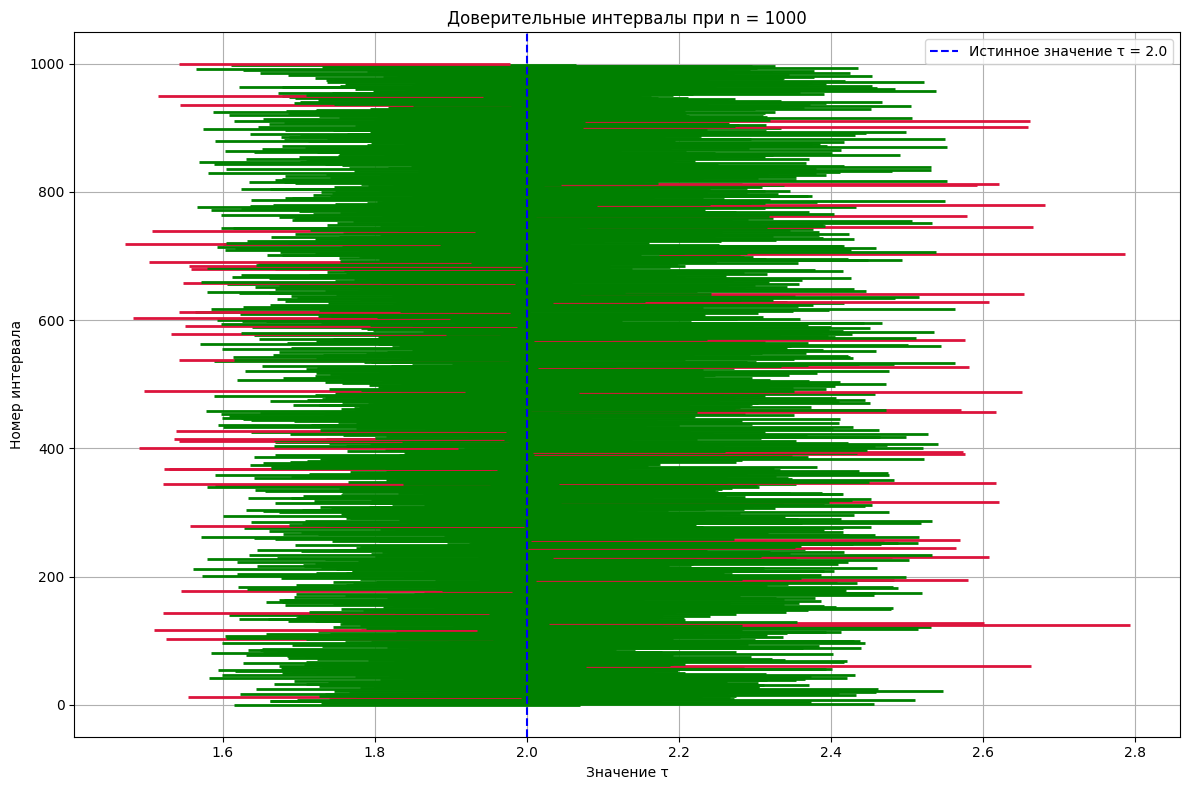

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Основная функция, которую ты использовала
def run_experiment_f(n1, n2, mu1=0, mu2=0, sigma1_sq=2.0, sigma2_sq=1.0, alpha=0.05, num_trials=1000, return_intervals=False):
    tau_real = sigma1_sq / sigma2_sq  # Истинное значение τ
    count_contains_tau = 0
    intervals = []

    for _ in range(num_trials):
        # Генерация выборок
        x1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n1)
        x2 = np.random.normal(mu2, np.sqrt(sigma2_sq), n2)

        # Смещённые выборочные дисперсии
        s1_sq = np.var(x1, ddof=0)
        s2_sq = np.var(x2, ddof=0)

        # Статистика F, приведённая к единичному τ
        f_ratio = (n1 * (n2 - 1)) / (n2 * (n1 - 1)) * (s1_sq / s2_sq)

        # Критические значения распределения Фишера
        f_crit_low = stats.f.ppf(alpha / 2, dfn=n1 - 1, dfd=n2 - 1)
        f_crit_high = stats.f.ppf(1 - alpha / 2, dfn=n1 - 1, dfd=n2 - 1)

        # Доверительный интервал
        lower = f_ratio / f_crit_high
        upper = f_ratio / f_crit_low

        if lower <= tau_real <= upper:
            count_contains_tau += 1

        if return_intervals:
            intervals.append((lower, upper))

    if return_intervals:
        return count_contains_tau / num_trials, intervals, tau_real
    else:
        return count_contains_tau / num_trials

# Функция для построения графика
def plot_intervals(intervals, true_value, title='Доверительные интервалы для τ'):
    plt.figure(figsize=(12, 8))
    for i, (start, end) in enumerate(intervals):
        color = 'green' if start <= true_value <= end else 'crimson'
        plt.hlines(i, start, end, colors=color, linewidth=2)
    plt.axvline(true_value, color='blue', linestyle='--', label=f'Истинное значение τ = {true_value}')
    plt.xlabel('Значение τ')
    plt.ylabel('Номер интервала')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Использование: n = 25
coverage_25, intervals_25, tau = run_experiment_f(n1=25, n2=25, return_intervals=True)
print(f"Доля интервалов (n=25), содержащих реальное значение τ: {coverage_25:.3f}")
plot_intervals(intervals_25, tau, title='Доверительные интервалы при n = 25')

# Использование: n = 1000
coverage_1000, intervals_1000, _ = run_experiment_f(n1=1000, n2=1000, return_intervals=True)
print(f"Доля интервалов (n=1000), содержащих реальное значение τ: {coverage_1000:.3f}")
plot_intervals(intervals_1000, tau, title='Доверительные интервалы при n = 1000')


Обе оценки находятся близко к уровню доверия $1 - \alpha = 0.95$, что подтверждает корректность построенных доверительных интервалов и соответствие их реальной частоте покрытия.

На графиках видно, что при $n = 25$ интервалы получаются значительно более широкими и разбросанными. При $n = 1000$ интервалы становятся существенно уже и плотнее сосредоточены около истинного значения параметра.

---

Таким образом, **увеличение объёма выборки не приводит к росту вероятности попадания (она и так задаётся уровнем доверия), но**:
- **интервалы становятся уже**, что свидетельствует о **повышении точности** оценки,
- **вариация границ интервала уменьшается**, и сами оценки становятся более стабильными и надёжными.\

## Оценка отношения дисперсий при известных средних (вариант 4)

В этом варианте нужно оценить параметр:

$$
\tau = \frac{\sigma_1^2}{\sigma_2^2}
$$

где средние значения **известны**: $\mu_1 = 0$, $\mu_2 = 0$  
А дисперсии: $\sigma_1^2 = 2$, $\sigma_2^2 = 1$

Оценка строится на основе сумм квадратов отклонений от **заданных** средних. Формула для построения статистики:

$$
F =
\frac{n_2 \sum\limits_{i=1}^{n_1} (X_{1,i} - \mu_1)^2}{n_1 \sum\limits_{i=1}^{n_2} (X_{2,i} - \mu_2)^2}
\cdot \frac{\sigma_2^2}{\sigma_1^2}
$$

В отличие от варианта 3, здесь используется **точное знание** $\mu_1$ и $\mu_2$, и, соответственно, не нужно вычитать выборочные средние.  

---

В эксперименте:

- Проводим 1000 повторений
- Строим 95% доверительные интервалы на основе распределения Фишера $F_{n_1, \; n_2}$
- Сравниваем покрытия при $n = 25$ и $n = 1000$
- Оцениваем, насколько часто интервал содержит истинное значение $\tau = 2$


In [ ]:
import numpy as np
import scipy.stats as stats

def run_experiment_f_known_means(n1, n2, mu1=0, mu2=0, sigma1_sq=2.0, sigma2_sq=1.0, alpha=0.05, num_trials=1000):
    tau_real = sigma1_sq / sigma2_sq
    count_contains_tau = 0

    for _ in range(num_trials):
        # Генерация выборок
        x1 = np.random.normal(mu1, np.sqrt(sigma1_sq), n1)
        x2 = np.random.normal(mu2, np.sqrt(sigma2_sq), n2)

        # Суммы квадратов отклонений от известных средних
        ssq1 = np.sum((x1 - mu1) ** 2)
        ssq2 = np.sum((x2 - mu2) ** 2)

        # Статистика по формуле из задания
        f_stat = (n2 * ssq1) / (n1 * ssq2) * (sigma2_sq / sigma1_sq)

        # Критические значения F-распределения
        f_crit_low = stats.f.ppf(alpha / 2, dfn=n1, dfd=n2)
        f_crit_high = stats.f.ppf(1 - alpha / 2, dfn=n1, dfd=n2)

        # Интервал для τ
        lower = f_stat / f_crit_high
        upper = f_stat / f_crit_low

        if lower <= tau_real <= upper:
            count_contains_tau += 1

    return count_contains_tau / num_trials

# Случай 1: n = 25
coverage_25 = run_experiment_f_known_means(n1=25, n2=25)
print(f"Доля интервалов (n=25), содержащих реальное значение τ: {coverage_25:.3f}")

# Случай 2: n = 1000
coverage_1000 = run_experiment_f_known_means(n1=1000, n2=1000)
print(f"Доля интервалов (n=1000), содержащих реальное значение τ: {coverage_1000:.3f}")


Доля интервалов (n=25), содержащих реальное значение τ: 0.600
Доля интервалов (n=1000), содержащих реальное значение τ: 0.000


# Задание 2 (2 вариант)

Рассмотрим распределение Лапласса с единичным параметром масштаба $\beta = 1$ и неизвестным параметром сдвига $\mu$
Найдем выборочную математическое ожидание $E$ для выборки $X$, которая, в силу того, что параметр сдвигу $\mu$ распределения Лапласса является медианой и мат.ожиданием, будет оценкой параметра $\mu$.

Найдем мат. ожидание и дисперсию данного распределения:

$$E(X) =  \mu\quad D(X) = \frac{2}{\beta^2} = 2$$

Центральная предельная теорема утверждает, что для достаточно большого числа выборок любой совокупности случайных величин, распределенных по одному и тому же закону, независимо от формы этого закона, распределение средних значений этих случайных величин приближается к нормальному распределению.

То есть:

$$Z = \sqrt{n}\frac{\overline{X} - \mu}{\sqrt{D}} \sim N(0, 1) $$

Обозначим $Z_a$ -- квантиль уровня $a$ стандартного нормального распределения.

Тогда доверительный интервал можно записать в виде:
$$P(-Z_{1 - \alpha/2} \le Z \le Z_{1 - \alpha/2}) = 1 - \alpha$$
Или, подставив значение $Z$:
$$P(-Z_{1 - \alpha/2} \le \sqrt{n}\frac{\overline{X} - \mu}{\sqrt{D}} \le Z_{1 - \alpha/2}) \rightarrow 1 - \alpha$$
$$P(-Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} \le \overline{X} - \mu \le Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}}) \rightarrow 1 - \alpha$$
$$P(-Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} - \overline{X} \le - \mu \le Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} - \overline{X}) \rightarrow 1 - \alpha$$
$$P(\overline{X} - Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} \le \mu \le \overline{X} + Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}}) \rightarrow 1 - \alpha$$

Полученный доверительный интервал для параметра $\mu$:
$$\left[\overline{X} - Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}};~~ \overline{X} + Z_{1 - \alpha/2}\frac{\sqrt{D}}{\sqrt{n}} \right]$$

Sample size: 10, Success rate: 0.850


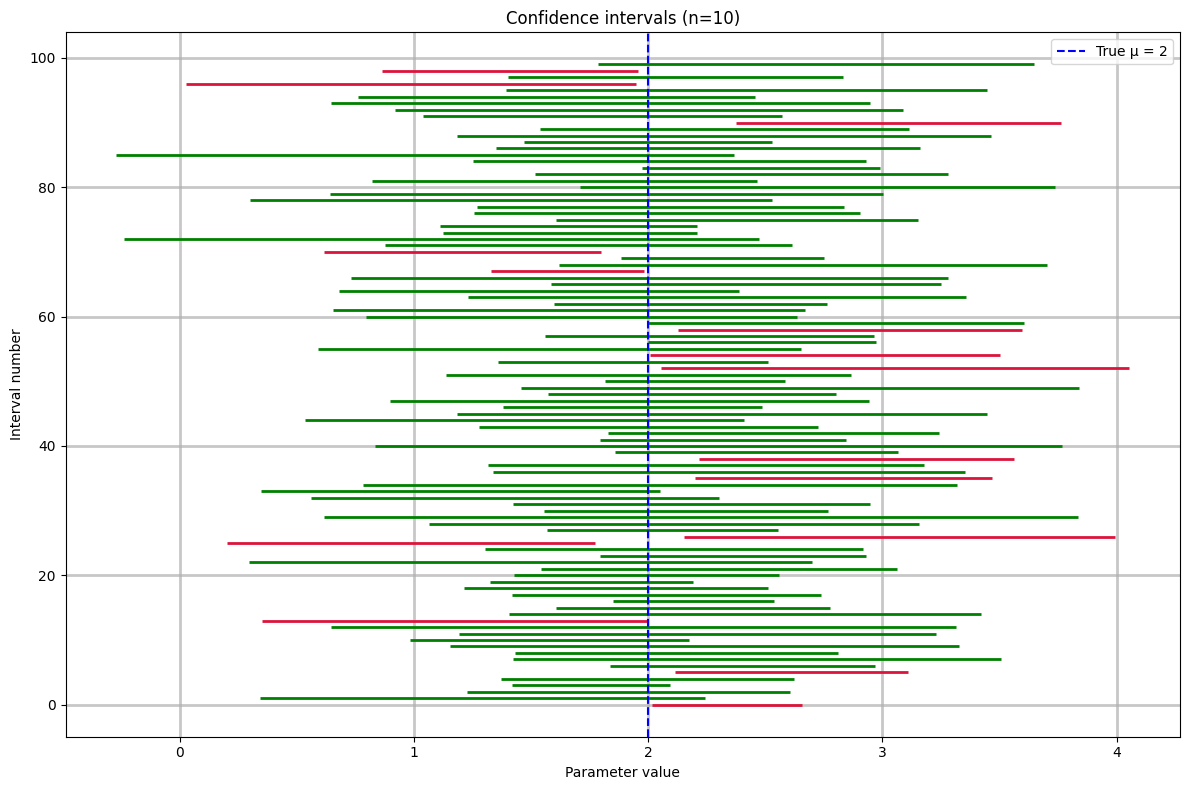

Sample size: 10000, Success rate: 0.970


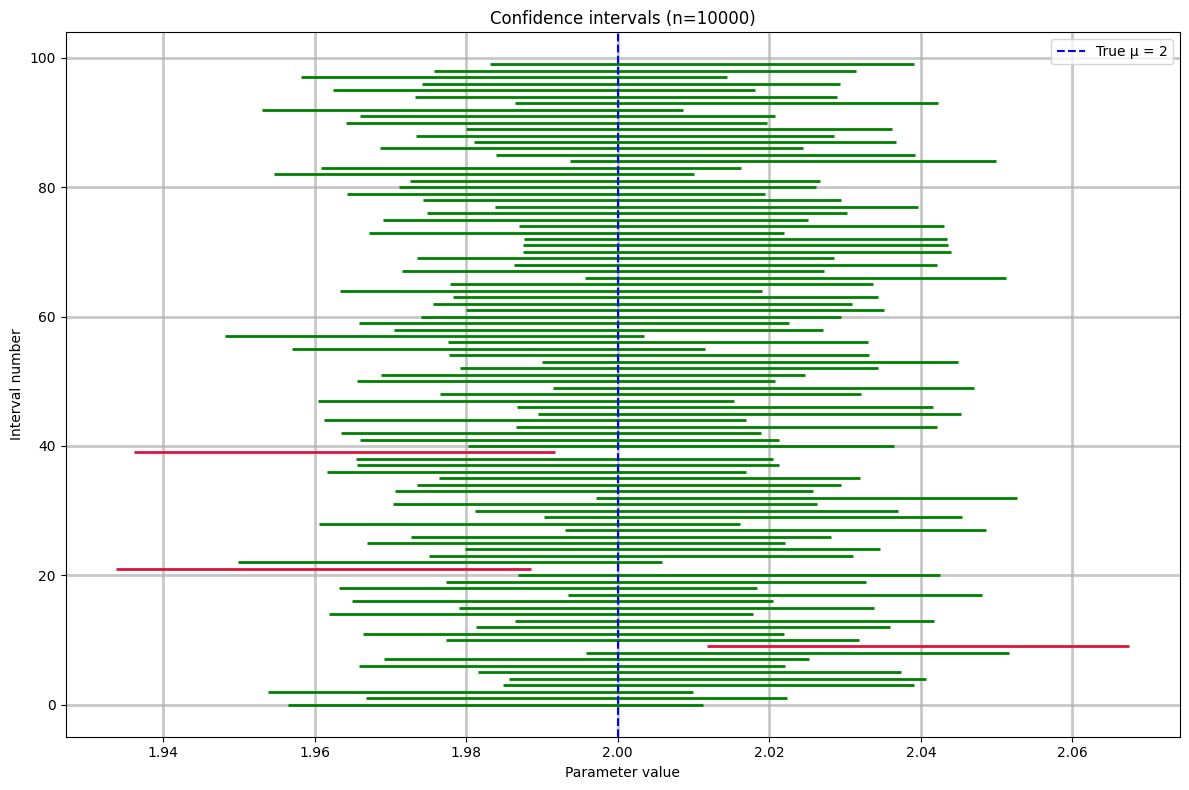

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Параметры распределения
mu = 2
alpha = 0.05


def interval(X, alpha):

    mean = np.mean(X)
    D = np.var(X, ddof=1)
    Z = stats.norm.ppf(1 - alpha / 2)
    N = len(X)

    left = mean - Z * np.sqrt(D / N)
    right = mean + Z * np.sqrt(D / N)
    return left, right


def laplace(n):
    beta = 1
    return np.random.laplace(mu, beta, n)


def plot_histogram(starts, ends, true_val, sample_size):
    plt.figure(figsize=(12, 8))
    plt.title(f'Confidence intervals (n={sample_size})')
    plt.xlabel('Parameter value')
    plt.ylabel('Interval number')
    plt.grid(True,  linewidth=2, alpha=0.7)

    colors = ['crimson' if (true_val < starts[i] or true_val > ends[i]) else 'green'
              for i in range(len(starts))]

    plt.hlines(range(len(starts)), starts, ends, colors=colors, linewidth=2)
    plt.axvline(x=true_val, color='blue', linestyle='--', label=f'True μ = {true_val}')
    plt.legend()
    plt.tight_layout()


def check_intervals(N, samples_size):
    intervals_starts = []
    intervals_ends = []

    for _ in range(N):
        samples = laplace(samples_size)
        left, right = interval(samples, alpha)
        intervals_starts.append(left)
        intervals_ends.append(right)
    plot_histogram(intervals_starts, intervals_ends, mu, samples_size)

    # Расчет доли успешных покрытий
    success_rate = np.mean([intervals_starts[i] <= mu <= intervals_ends[i]
                            for i in range(N)])
    print(f"Sample size: {samples_size}, Success rate: {success_rate:.3f}")


check_intervals(N=100, samples_size=10)
plt.show()

check_intervals(N=100, samples_size=10000)
plt.show()